In [2]:
import pandas as pd

df = pd.read_csv("../data/tuik_youth_unemployment_2023_2025.csv")

# Option 1: show the first few rows
df.head()

# Option 2: explicitly print
print(df.head())



      date  year  month  unemployment_rate
0  2005-01  2005      1               16.7
1  2005-02  2005      2               17.6
2  2005-03  2005      3               17.3
3  2005-04  2005      4               17.3
4  2005-05  2005      5               17.3


In [6]:
import sys
sys.path.append("../src")  
from preprocessing import preprocess
df = preprocess(df)
df.head()


,date,year,month,unemployment_rate,time_index
0,2005-01-01,2005,1,16.7,0
1,2005-02-01,2005,2,17.6,1
2,2005-03-01,2005,3,17.3,2
3,2005-04-01,2005,4,17.3,3
4,2005-05-01,2005,5,17.3,4


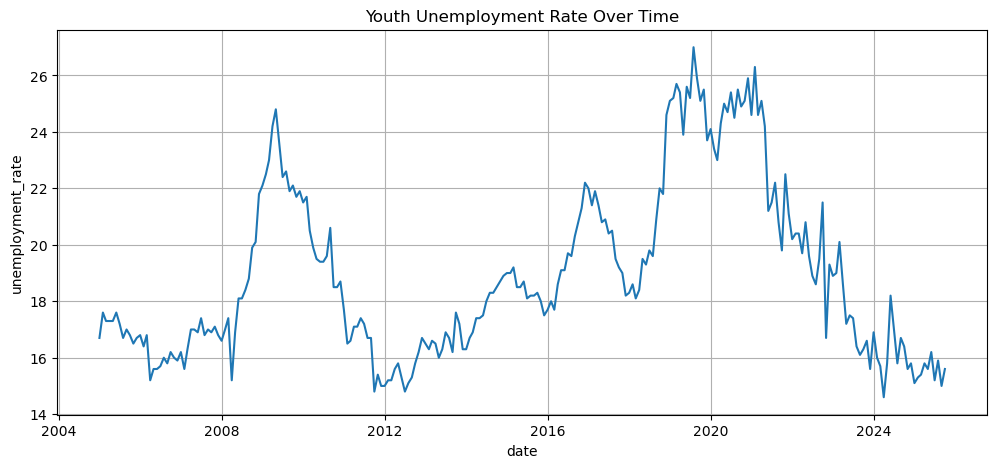

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='unemployment_rate', data=df)
plt.title("Youth Unemployment Rate Over Time")
plt.grid(True)
plt.show()


In [8]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df  = df.iloc[train_size:]

X_train = train_df[['time_index']]
y_train = train_df['unemployment_rate']

X_test = test_df[['time_index']]
y_test = test_df['unemployment_rate']


In [9]:
from train_linear import train_linear

lin_model = train_linear(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)


In [11]:
from train_gb import train_gb
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import numpy as np

# Train model
gb_model = train_gb(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)


print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 5.08
MAE: 4.64


In [12]:
from evaluate import evaluate_linear, evaluate_gb
from train_linear import train_linear
from train_gb import train_gb

# --- Linear Regression ---
lin_model = train_linear(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
lin_eval = evaluate_linear(y_test, y_pred_lin)
print(lin_eval)

# --- Gradient Boosting ---
gb_model = train_gb(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_eval = evaluate_gb(y_test, y_pred_gb)
print(gb_eval)


{'Model': 'Linear Regression', 'RMSE': 6.477404066115494, 'MAE': 5.964913297832445, 'R2': -8.691851895353546}
{'Model': 'Gradient Boosting', 'RMSE': 5.078055857511368, 'MAE': 4.643662926226092, 'R2': -4.956617830688469}


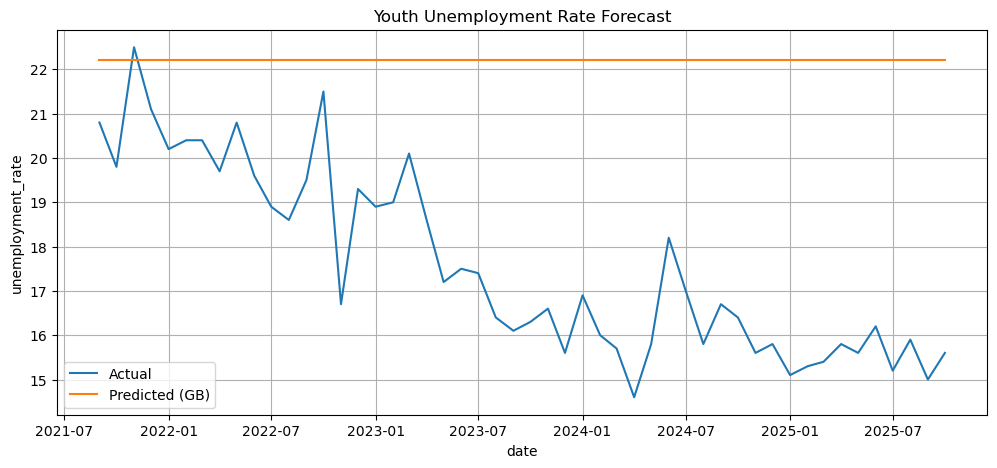

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x=test_df['date'], y=y_test, label='Actual')
sns.lineplot(x=test_df['date'], y=y_pred_gb, label='Predicted (GB)')
plt.title("Youth Unemployment Rate Forecast")
plt.grid(True)
plt.show()



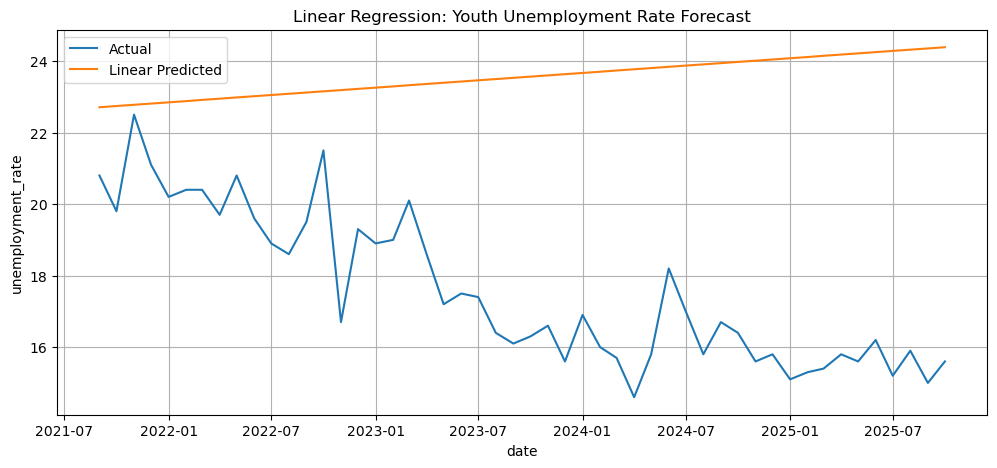

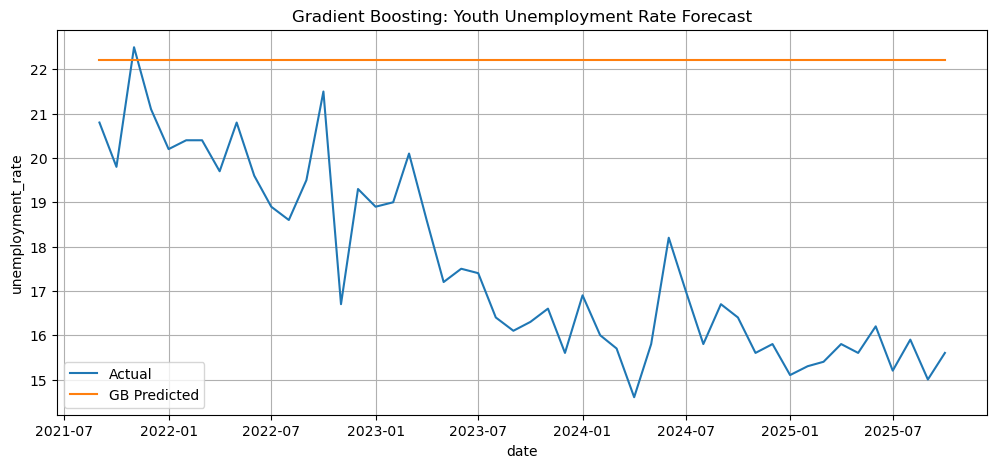

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
plt.figure(figsize=(12,5))
sns.lineplot(x=test_df['date'], y=y_test, label='Actual')
sns.lineplot(x=test_df['date'], y=y_pred_lin, label='Linear Predicted')
plt.title("Linear Regression: Youth Unemployment Rate Forecast")
plt.grid(True)
plt.show()

# Gradient Boosting
plt.figure(figsize=(12,5))
sns.lineplot(x=test_df['date'], y=y_test, label='Actual')
sns.lineplot(x=test_df['date'], y=y_pred_gb, label='GB Predicted')
plt.title("Gradient Boosting: Youth Unemployment Rate Forecast")
plt.grid(True)
plt.show()


In [16]:
X_train = train_df[['time_index', 'month', 'year']]
X_test  = test_df[['time_index', 'month', 'year']]


In [18]:
gb_model = train_gb(X_train, y_train)


In [19]:
future_df = pd.DataFrame({
    'date': future_dates,
    'time_index': range(last_index + 1, last_index + 1 + future_months),
    'month': future_dates.month,
    'year': future_dates.year
})
y_future_pred = gb_model.predict(future_df[['time_index','month','year']])


In [21]:
import sys
sys.path.append("../src")  
from preprocessing import preprocess
df = preprocess(df)
df.head()



,date,year,month,unemployment_rate,time_index
0,2005-01-01,2005,1,16.7,0
1,2005-02-01,2005,2,17.6,1
2,2005-03-01,2005,3,17.3,2
3,2005-04-01,2005,4,17.3,3
4,2005-05-01,2005,5,17.3,4


In [22]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df  = df.iloc[train_size:]

X_train = train_df[['time_index', 'month', 'year']]
y_train = train_df['unemployment_rate']

X_test = test_df[['time_index', 'month', 'year']]
y_test = test_df['unemployment_rate']


In [23]:
from train_gb import train_gb

gb_model = train_gb(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [36]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from evaluate_utils import evaluate


In [37]:
lin_eval = evaluate(y_test, y_pred_lin)
print("Linear Regression:", lin_eval)

gb_eval = evaluate(y_test, y_pred_gb)
print("Gradient Boosting:", gb_eval)


Linear Regression: {'RMSE': 6.477404066115494, 'MAE': 5.964913297832445, 'R2': -8.691851895353546}
Gradient Boosting: {'RMSE': 4.858775061514897, 'MAE': 4.398985014964401, 'R2': -4.45328728310593}


In [38]:
import pandas as pd

# How many months to forecast
future_months = 12

# Last index in dataset
last_index = df['time_index'].iloc[-1]

# Future dates
future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=30),
                             periods=future_months, freq='M')

# Future dataframe with features
future_df = pd.DataFrame({
    'date': future_dates,
    'time_index': range(last_index + 1, last_index + 1 + future_months),
    'month': future_dates.month,
    'year': future_dates.year
})

# Predict future unemployment
y_future_pred = gb_model.predict(future_df[['time_index','month','year']])
future_df['predicted_unemployment_rate'] = y_future_pred

future_df


C:\Users\90552\AppData\Local\Temp\ipykernel_27808\3920455670.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=30),


,date,time_index,month,year,predicted_unemployment_rate
0,2025-10-31,250,10,2025,22.187139
1,2025-11-30,251,11,2025,22.187139
2,2025-12-31,252,12,2025,22.187139
3,2026-01-31,253,1,2026,21.806229
4,2026-02-28,254,2,2026,21.806229
5,2026-03-31,255,3,2026,21.713380
6,2026-04-30,256,4,2026,21.785600
7,2026-05-31,257,5,2026,21.779469
8,2026-06-30,258,6,2026,21.782966
9,2026-07-31,259,7,2026,21.902746


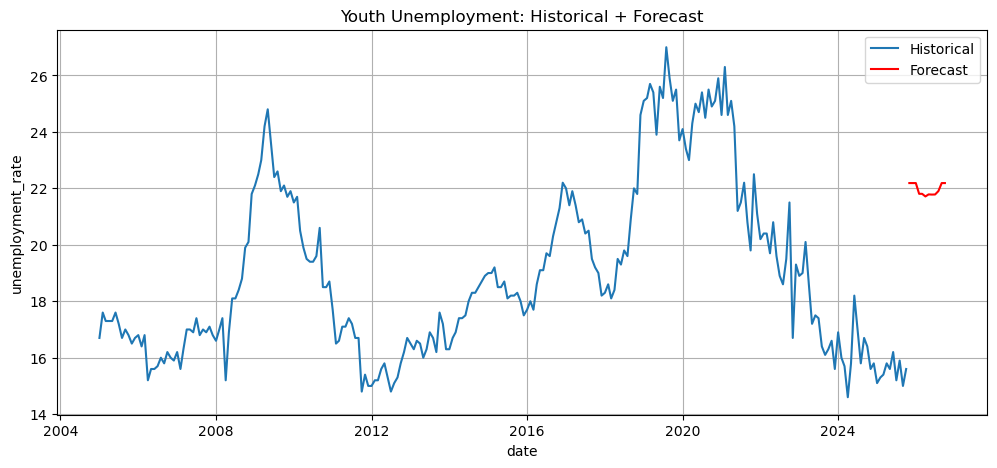

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x=df['date'], y=df['unemployment_rate'], label='Historical')
sns.lineplot(x=future_df['date'], y=future_df['predicted_unemployment_rate'], label='Forecast', color='red')
plt.title("Youth Unemployment: Historical + Forecast")
plt.grid(True)
plt.show()
